In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score  
from scipy import optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [75]:
##########
#Dataset 1
##########

#['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 
#'number vmail messages','total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 
#'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
#'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

##########
#Dataset 2
##########

#['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
#'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
#'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [86]:
df1_train = pd.read_pickle("./df1_train.pkl")
df1_test  = pd.read_pickle("./df1_test.pkl")

df2_train = pd.read_pickle("./df2_train.pkl")
df2_test  = pd.read_pickle("./df2_test.pkl")
#print(str(len(df1_train))+" "+str(len(df1_test))+" || "+str(len(df2_train))+" "+str(len(df2_test)))


#######################################################################################################
#Dataset 1
#######################################################################################################
#Initial Accuracy = 0.8592

#df1_train = df1_train.drop(columns=['account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed all columns except selected 10 features and 'churn'
#Accuracy = 0.8577

#df1_train = df1_train.drop(columns=['state', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['state', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed 'state'
#Accuracy = 0.8563

#df1_train = df1_train.drop(columns=['state', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['state', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed 'total eve charge'
#Accuracy = 0.8548

#df1_train = df1_train.drop(columns=['state', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['state', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed  'voice mail plan'
#Accuracy = 0.8563

#df1_train = df1_train.drop(columns=['state', 'total intl minutes', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['state', 'total intl minutes', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed  'total intl minutes'
#Accuracy = 0.8563

#df1_train = df1_train.drop(columns=['state', 'customer service calls', 'total intl minutes', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['state', 'customer service calls', 'total intl minutes', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed  'customer service calls'
#Accuracy = 0.8490

#df1_train = df1_train.drop(columns=['state', 'total night minutes', 'customer service calls', 'total intl minutes', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#df1_test = df1_test.drop(columns=['state', 'total night minutes', 'customer service calls', 'total intl minutes', 'voice mail plan', 'total eve charge', 'account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge'])
#Removed  'total night minutes'
#Accuracy = 0.8447

#df2_train

,international plan,number vmail messages,total day minutes,total day charge,total eve minutes,churn
phone number,,,,,,
0,0.0,25.0,265.1,45.07,197.4,0.0
1,0.0,26.0,161.6,27.47,195.5,0.0
2,0.0,0.0,243.4,41.38,121.2,0.0
3,1.0,0.0,299.4,50.90,61.9,0.0
4,1.0,0.0,166.7,28.34,148.3,0.0
5,0.0,24.0,218.2,37.09,348.5,0.0
6,1.0,0.0,157.0,26.69,103.1,0.0
7,0.0,0.0,184.5,31.37,351.6,0.0
8,1.0,37.0,258.6,43.96,222.0,0.0


### Base code for Logistic Regression

In [87]:
def run_logistic_regression(df_train, df_test):
    X_train = df_train.iloc[:,:-1]
    y_train = df_train.iloc[:,-1:]
    X_test  = df_test.iloc[:,:-1]
    y_test  = df_test.iloc[:,-1:]
    
    logreg       = LogisticRegression()                       # instantiate the model (using the default parameters)
    logreg.fit(X_train,y_train)                             # fit the model with data = TRAIN
    
    y_pred_train       = logreg.predict(X_train)
    y_pred_test        = logreg.predict(X_test)                     #predict
    cnf_matrix_train   = metrics.confusion_matrix(y_train, y_pred_train)
    cnf_matrix_test    = metrics.confusion_matrix(y_test , y_pred_test)
    cnf_matrix_train   = cnf_matrix_train/len(df_train)
    cnf_matrix_test    = cnf_matrix_test/len(df_test)
    
    class_names=[0,1]
    
    print("Confusion Matrix Training set")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("Confusion Matrix Test set")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("=================On test set=================")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
    print("Precision:",metrics.precision_score(y_test, y_pred_test))
    print("Recall:",metrics.recall_score(y_test, y_pred_test))
    print("F1 Score:",metrics.f1_score(y_test, y_pred_test))
    return

### First we try Logistic Regression without Normalization
Since => Normalizing data is done for accelerating optimization. If you have features with different scales, it will take too much time for your optimizer function to find optimal points.

**And we know that the range of our data is not very high so without normalization it should still give satisfactory result**

********************************** Data Frame 1 **********************************
Confusion Matrix Training set


D:\Software\SDE\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software\SDE\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


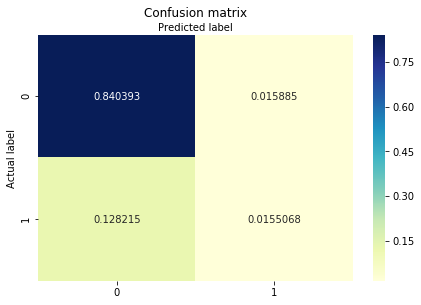

Confusion Matrix Test set


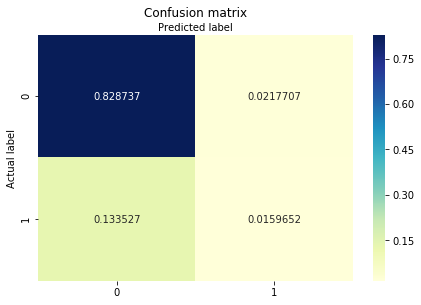

=================On test set=================
Accuracy: 0.8447024673439768
Precision: 0.4230769230769231
Recall: 0.10679611650485436
F1 Score: 0.17054263565891473
********************************** Data Frame 2 **********************************
Confusion Matrix Training set


D:\Software\SDE\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software\SDE\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


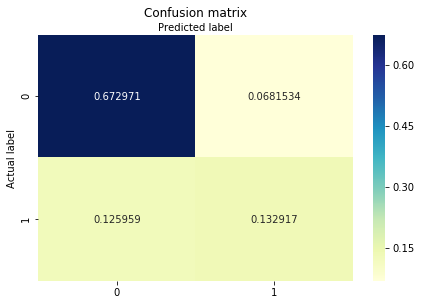

Confusion Matrix Test set


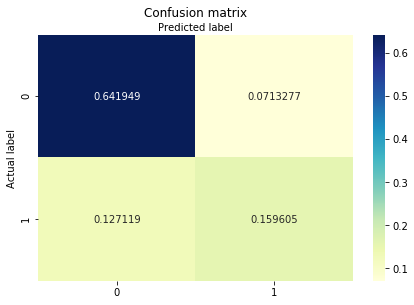

=================On test set=================
Accuracy: 0.8015536723163842
Precision: 0.691131498470948
Recall: 0.5566502463054187
F1 Score: 0.616643929058663


In [88]:
print("********************************** Data Frame 1 **********************************")
run_logistic_regression(df1_train, df1_test)

print("********************************** Data Frame 2 **********************************")
run_logistic_regression(df2_train, df2_test)

### TODO : Compare precision and recall of both datasets

write result_______________________-

### Next we try Logistic Regression with Mean normalization
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

In [ ]:
df1_train_std = preprocessing.scale(df1_train)
df1_test_std = preprocessing.scale(df1_test)
df2_train_std = preprocessing.scale(df2_train)
df2_test_std = preprocessing.scale(df2_test)

In [ ]:
print("********************************** Data Frame 1 **********************************")
run_logistic_regression(df1_train, df1_test)

print("********************************** Data Frame 2 **********************************")
run_logistic_regression(df2_train, df2_test)

As expected there isn't much improvement due to mean normalization as stated earlier

### Note : At this point we are keeping all attributes we haven't done any feature selection
So next we do feature selection specially it is needed in the second dataset

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

Sometimes, feature selection is mistaken with dimensionality reduction. But they are different. Feature selection is different from dimensionality reduction. Both methods tend to reduce the number of attributes in the dataset, but a dimensionality reduction method does so by creating new combinations of attributes (sometimes known as feature transformation), whereas feature selection methods include and exclude attributes present in the data without changing them.

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [10]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

NameError: name 'X' is not defined

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

Best alpha using built-in LassoCV: 0.184142
Best score using built-in LassoCV: 0.226716
Lasso picked 3 variables and eliminated the other 16 variables


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


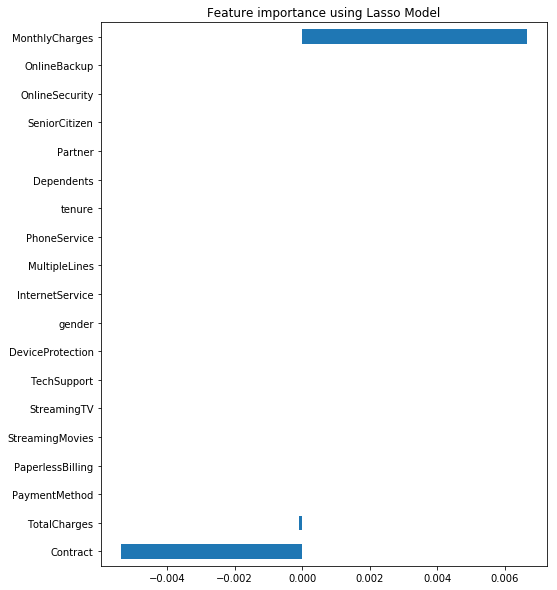

In [11]:
reg = LassoCV()
reg.fit(df2_train.iloc[:,:-1], df2_train.iloc[:,-1:])
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(df2_train.iloc[:,:-1], df2_train.iloc[:,-1:]))
coef = pd.Series(reg.coef_, index = df2_train.iloc[:,:-1].columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")